In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('C:/Users/KIIT/Downloads/Rice stock.csv')

In [18]:
df = df[:2000]

In [19]:
df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,06-11-2019,11.950,12.050,11.910,11.990,0.030,12.000,225,8318
1,05-11-2019,11.860,11.985,11.825,11.965,0.120,11.970,360,8227
2,04-11-2019,11.970,11.985,11.840,11.860,0.135,11.850,262,8163
3,01-11-2019,12.010,12.065,11.935,11.970,0.035,11.985,305,8119
4,31-10-2019,12.000,12.080,11.955,11.920,0.020,12.020,552,8251
5,30-10-2019,11.955,12.205,11.900,11.985,0.075,12.000,1195,8136
6,29-10-2019,11.820,11.990,11.735,11.945,0.090,11.925,1399,7438
7,28-10-2019,12.035,12.085,11.825,11.825,0.215,11.835,1218,6842
8,25-10-2019,11.980,12.085,11.955,12.040,0.060,12.050,695,6494
9,24-10-2019,11.950,12.010,11.910,11.980,0.070,11.990,670,6116


In [20]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df = df.reindex(index=df.index[::-1])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1999 to 0
Data columns (total 9 columns):
Date                          2000 non-null datetime64[ns]
Open                          1999 non-null float64
High                          1999 non-null float64
Low                           2000 non-null float64
Last                          2000 non-null float64
Change                        1378 non-null float64
Settle                        2000 non-null float64
Volume                        2000 non-null int64
Previous Day Open Interest    2000 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 140.8 KB


In [23]:
df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
1999,2011-11-22,14.595,14.595,14.595,14.595,NaN,14.595,273,4620
1998,2011-11-23,14.845,14.845,14.845,14.845,NaN,14.845,585,4945
1997,2011-11-25,14.530,14.530,14.530,14.530,NaN,14.530,364,5140
1996,2011-11-28,14.445,14.445,14.445,14.445,NaN,14.445,196,4952
1995,2011-11-29,14.640,14.665,14.640,14.665,NaN,14.665,997,5724
1994,2011-11-30,15.120,15.130,15.110,15.130,NaN,15.130,755,6171
1993,2011-01-12,15.050,15.070,15.050,15.070,NaN,15.070,1820,6733
1992,2011-02-12,14.745,14.745,14.745,14.745,NaN,14.745,802,6967
1991,2011-05-12,14.675,14.675,14.675,14.675,NaN,14.675,701,7403
1990,2011-06-12,14.880,14.880,14.880,14.880,NaN,14.880,1091,8060


In [24]:
df.set_index('Date',inplace=True)

In [25]:
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2011-11-22,14.595,14.595,14.595,14.595,NaN,14.595,273,4620
2011-11-23,14.845,14.845,14.845,14.845,NaN,14.845,585,4945
2011-11-25,14.530,14.530,14.530,14.530,NaN,14.530,364,5140
2011-11-28,14.445,14.445,14.445,14.445,NaN,14.445,196,4952
2011-11-29,14.640,14.665,14.640,14.665,NaN,14.665,997,5724


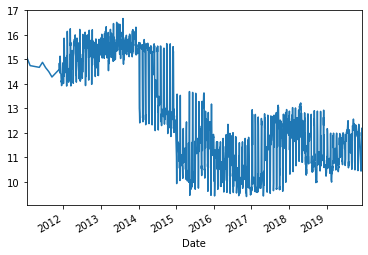

In [26]:
df['Settle'].plot()

In [27]:
timeseries = df['Settle']

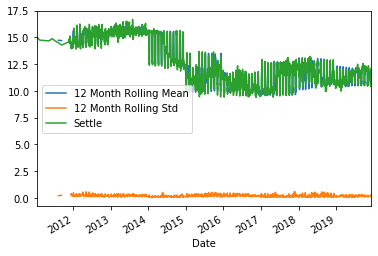

In [28]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

In [29]:
timeseries.rolling(12).mean()

Date
2011-11-22          NaN
2011-11-23          NaN
2011-11-25          NaN
2011-11-28          NaN
2011-11-29          NaN
                ...    
2019-10-31    12.043750
2019-01-11    12.020417
2019-04-11    11.984583
2019-05-11    11.965417
2019-06-11    11.959583
Name: Settle, Length: 2000, dtype: float64

<Figure size 432x288 with 0 Axes>

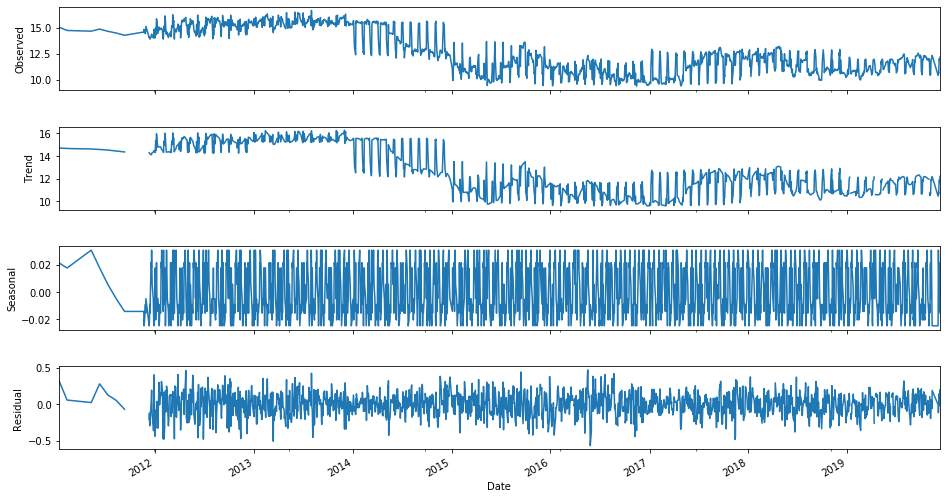

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Settle'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Settle'])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.825965277936307
p-value : 0.3676489630126898
#Lags Used : 0
Number of Observations Used : 1999
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

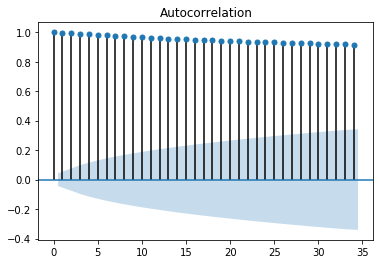

In [33]:
fig_first = plot_acf(df["Settle"].dropna())

In [34]:
df['Settle 1'] = df['Settle'] - df['Settle'].shift(1)

In [35]:
result = adfuller(df['Settle 1'].dropna())
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.68225881227622
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1998
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


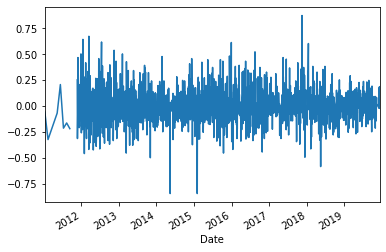

In [36]:
df['Settle 1'].plot()

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

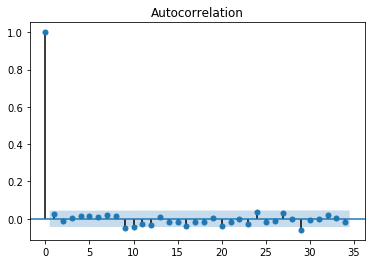

In [38]:
fig_first = plot_acf(df["Settle 1"].dropna())

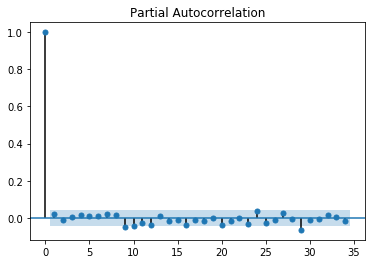

In [39]:
fig_first = plot_pacf(df["Settle 1"].dropna())

In [46]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df['Settle'], order=(2,1,1))
result = model.fit(disp = 0)
print(result.summary())

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Settle   No. Observations:                 1999
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 875.613
Method:                       css-mle   S.D. of innovations              0.156
Date:                Mon, 06 Jan 2020   AIC                          -1741.225
Time:                        21:44:32   BIC                          -1713.223
Sample:                             1   HQIC                         -1730.943
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0013      0.004     -0.367      0.714      -0.008       0.006
ar.L1.D.Settle    -0.1495      0.972     -0.154      0.878      -2.055       1.756
ar.L2.D.Settle    -0.0105      0.034

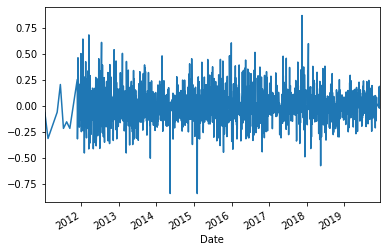

In [47]:
result.resid.plot()

In [48]:
result.resid

Date
2011-11-23    0.251296
2011-11-25   -0.319530
2011-11-28   -0.072671
2011-11-29    0.218053
2011-11-30    0.460762
                ...   
2019-10-31    0.021394
2019-01-11   -0.033419
2019-04-11   -0.132735
2019-05-11    0.123922
2019-06-11    0.026575
Length: 1999, dtype: float64

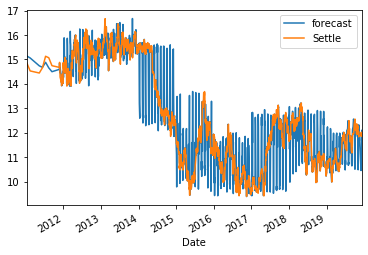

In [49]:
result.plot_predict(dynamic=False)
plt.show()

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


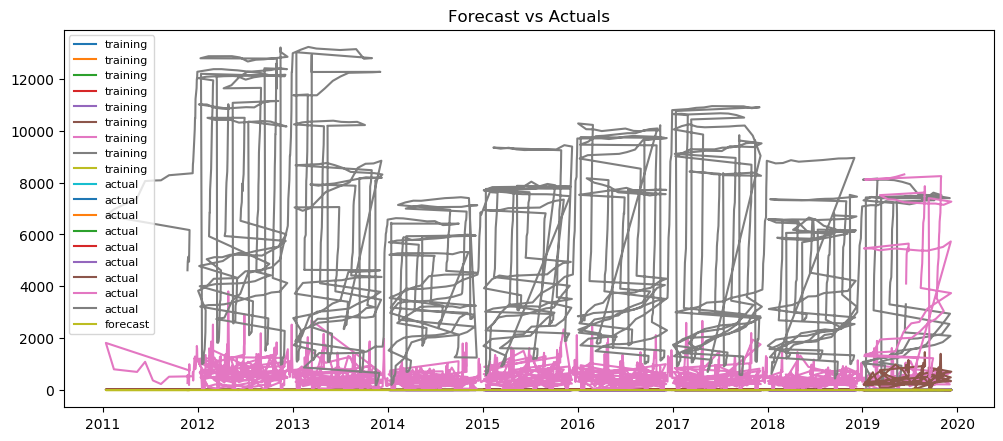

In [51]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.iloc[:1900]
test = df.iloc[1900:]

# Build Model 
model = ARIMA(train['Settle'], order=(2,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [52]:
fitted.summary()# 1 1 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1899
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 808.500
Method:                       css-mle   S.D. of innovations              0.158
Date:                Mon, 06 Jan 2020   AIC                          -1607.001
Time:                        21:45:23   BIC                          -1579.255
Sample:                             1   HQIC                         -1596.787
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0014      0.004     -0.384      0.701      -0.009       0.006
ar.L1.D.Settle    -0.1684      0.967     -0.174      0.862      -2.063       1.726
ar.L2.D.Settle    -0.0127      0.029     -0.436      0.663      -0.070       0.045
ma.L1.D.Settle     0.1844      0.967      0.191      0.849      -1.710       2.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.6027           -5.9022j            8.8562           -0.3839
AR.2           -6.6027           +5.9022j            8.8562            0.3839
MA.1           -5.4227           +0.0000j            5.4227            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
rmse = np.mean((fc - test['Settle'])**2)**.5 

In [54]:
rmse

0.34936643896995406

In [55]:
mpe = np.mean((fc - test['Settle'])/test['Settle'])
mpe

-0.00440834837587387

In [56]:
df.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle 1
Date,,,,,,,,,
2019-10-31,12.00,12.080,11.955,11.920,0.020,12.020,552,8251,0.020
2019-01-11,12.01,12.065,11.935,11.970,0.035,11.985,305,8119,-0.035
2019-04-11,11.97,11.985,11.840,11.860,0.135,11.850,262,8163,-0.135
2019-05-11,11.86,11.985,11.825,11.965,0.120,11.970,360,8227,0.120
2019-06-11,11.95,12.050,11.910,11.990,0.030,12.000,225,8318,0.030


In [57]:
from pandas.tseries.offsets import DateOffset

In [58]:
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,1080) ]

In [59]:
future_dates

[Timestamp('2019-06-11 00:00:00'),
 Timestamp('2019-06-12 00:00:00'),
 Timestamp('2019-06-13 00:00:00'),
 Timestamp('2019-06-14 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-20 00:00:00'),
 Timestamp('2019-06-21 00:00:00'),
 Timestamp('2019-06-22 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2019-06-24 00:00:00'),
 Timestamp('2019-06-25 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-06-27 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-06-29 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-03 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-07-05 00:00:00'),
 Timestamp('2019-07-06 00:00:00'),
 Timestamp('2019-07-07 00:00:00'),
 Timestamp('2019-07-08 00:00:00'),
 Timestamp('2019-07-

In [60]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
df = future_df
df

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Settle 1
2011-11-22,14.595,14.595,14.595,14.595,NaN,14.595,273,4620,NaN
2011-11-23,14.845,14.845,14.845,14.845,NaN,14.845,585,4945,0.250
2011-11-25,14.530,14.530,14.530,14.530,NaN,14.530,364,5140,-0.315
2011-11-28,14.445,14.445,14.445,14.445,NaN,14.445,196,4952,-0.085
2011-11-29,14.640,14.665,14.640,14.665,NaN,14.665,997,5724,0.220
2011-11-30,15.120,15.130,15.110,15.130,NaN,15.130,755,6171,0.465
2011-01-12,15.050,15.070,15.050,15.070,NaN,15.070,1820,6733,-0.060
2011-02-12,14.745,14.745,14.745,14.745,NaN,14.745,802,6967,-0.325
2011-05-12,14.675,14.675,14.675,14.675,NaN,14.675,701,7403,-0.070
2011-06-12,14.880,14.880,14.880,14.880,NaN,14.880,1091,8060,0.205


c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


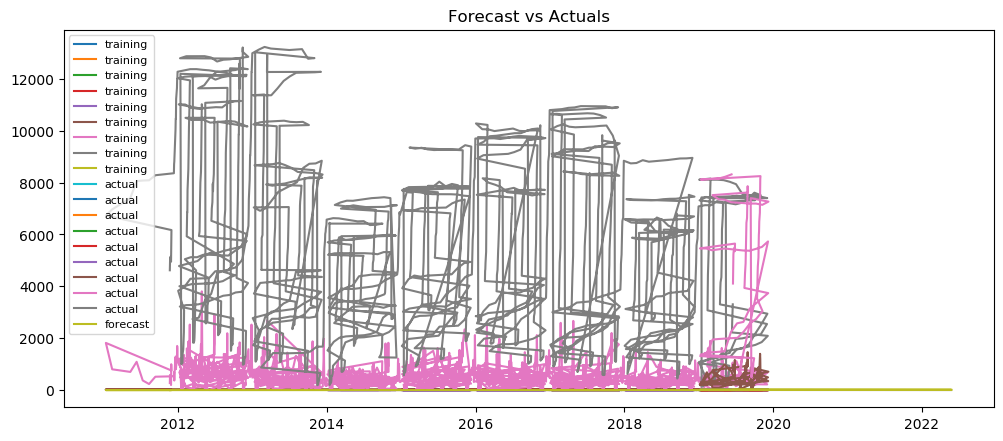

In [62]:
# Create Training and Test
train = df.iloc[:1900]
test = df.iloc[1900:]

# Build Model 
model = ARIMA(train['Settle'], order=(2,1,1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1179, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [63]:
fc_series #Rice forecast

2019-06-18    11.937647
2019-06-19    11.936649
2019-06-20    11.935198
2019-06-21    11.933806
2019-06-24    11.932410
                ...    
2022-05-21    10.299084
2022-05-22    10.297688
2022-05-23    10.296292
2022-05-24    10.294896
2022-05-25    10.293500
Length: 1179, dtype: float64

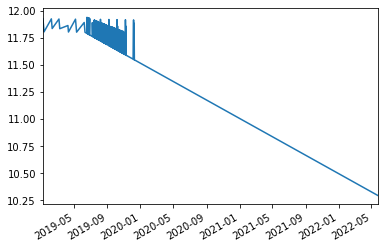

In [64]:
fc_series.plot()  #Rice forecast